In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# โหลด dataset แรก (จากไฟล์ CSV)
# df = pd.read_csv(r'F:\Thai_speech\Web-Application-For-AI-Generated-Image-Detection\train.csv')  # 1st dataset
# df["filepath"] = df["file_name"].apply(lambda x: os.path.join(r"F:\Thai_speech\Web-Application-For-AI-Generated-Image-Detection\train_data", x.split("train_data/")[-1]))


# โหลด dataset ที่สอง (จากโฟลเดอร์ FAKE และ REAL)
fake_folder = 'ai_images'
real_folder = 'real_images'

fake_images = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder)]
real_images = [os.path.join(real_folder, f) for f in os.listdir(real_folder)]

fake_labels = ['FAKE'] * len(fake_images)
real_labels = ['REAL'] * len(real_images)


df_combined = pd.DataFrame({
    'filepath': fake_images + real_images,
    'label': fake_labels + real_labels
})

# combine dataset
# df_combined = pd.concat([df, df], ignore_index=True)
# df_combined = df_combined.drop(columns=['Unnamed: 0','file_name'], errors='ignore')



In [7]:
# transform label from 0, 1, 'REAL', 'FAKE' to 'REAL' และ 'FAKE'
df_combined['label'] = df_combined['label'].map({
    0: 'REAL',
    1: 'FAKE',
    'REAL': 'REAL',
    'FAKE': 'FAKE'
})


print(df_combined['label'].unique())  #['REAL' 'FAKE']
df_combined.label.value_counts()

['FAKE' 'REAL']


,count
label,
FAKE,30
REAL,29


In [8]:
train_df, val_df = train_test_split(df_combined, test_size=0.2, random_state=42)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=32, # ajustable (better gpu > 64)
    class_mode='binary'
)

# validation
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=32, # ajustable (better gpu > 64)
    class_mode='binary'
)

Found 23 validated image filenames belonging to 1 classes.
Found 6 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 24 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 6 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # check gpu available


Num GPUs Available:  0


In [10]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16') # reduce calculation size from float32 to 16
mixed_precision.set_global_policy(policy)


In [11]:
!pip install mlflow

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [20]:
import mlflow
import mlflow.keras
mlflow.set_tracking_uri("http://37.187.200.200:8080")

mlflow.set_experiment("MobileNet-ImageClassification")


# Start MLflow run
mlflow.start_run()


2025/05/26 12:54:32 INFO mlflow.tracking.fluent: Experiment with name 'MobileNet-ImageClassification' does not exist. Creating a new experiment.


<ActiveRun: >

In [21]:

# Example parameters to log (update as needed)
mlflow.log_param("optimizer", "adam")
mlflow.log_param("learning_rate", 0.001)
mlflow.log_param("epochs", 3)  # For demonstration purposes


3

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.5217 - loss: 1.7324 - val_accuracy: 1.0000 - val_loss: 1.2826 - learning_rate: 1.0000e-04
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8696 - loss: 1.3052 - val_accuracy: 1.0000 - val_loss: 1.1715 - learning_rate: 1.0000e-04
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.9565 - loss: 1.0822 - val_accuracy: 1.0000 - val_loss: 1.0690 - learning_rate: 1.0000e-04
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 1.0288 - val_accuracy: 1.0000 - val_loss: 0.9382 - learning_rate: 1.0000e-04
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9565 - loss: 1.0634 - val_accuracy: 1.0000 - val_loss: 0.9090 - learning_rate: 1.0000e-04


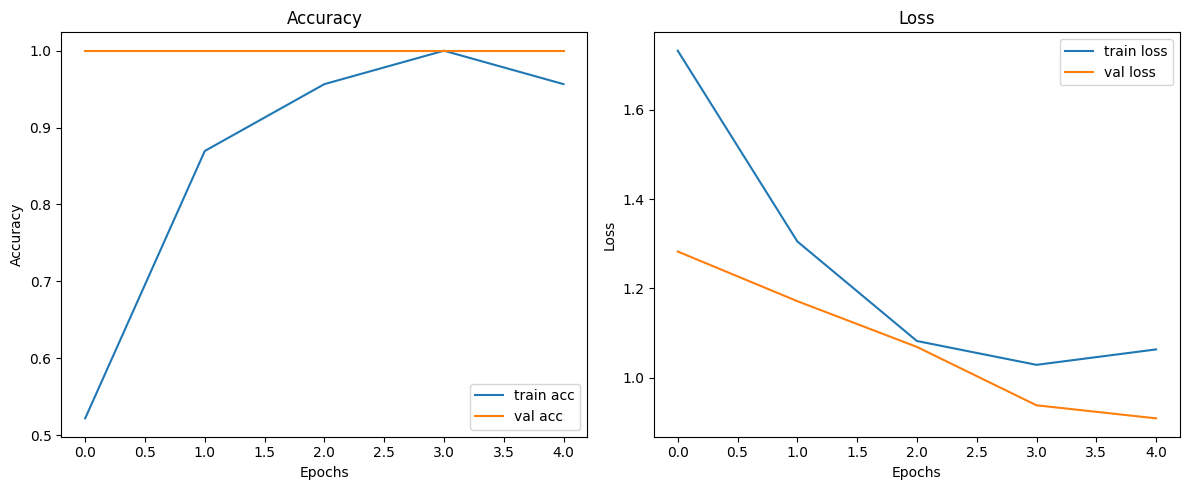

In [22]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Model using MobileNetV2
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,               # Exclude the top layer as we will add our own classifier
    weights='imagenet'               # Load pre-trained weights from ImageNet
)

base_model.trainable = False  # Freeze base model layers for transfer learning

# Model architecture
inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs)  # Apply MobileNetV2 as the base feature extractor
x = layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce the output size
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.002))(x)

model = models.Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,  # Assuming train_ds is the dataset
    validation_data=val_generator,  # Assuming val_ds is the validation dataset
    epochs=5,
    callbacks=[early_stop, lr_schedule],
)

# Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:

# Example logging of metrics after training
mlflow.log_metric("final_accuracy", history.history['accuracy'][-1])
mlflow.log_metric("final_loss", history.history['loss'][-1])


In [24]:

# Optionally log model
mlflow.keras.log_model(model, "mobilenet_model")

# End MLflow run
mlflow.end_run()


2025/05/26 12:55:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/26 12:56:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run marvelous-horse-135 at: http://37.187.200.200:8080/#/experiments/1/runs/99dde54633d94531b458634277086085
🧪 View experiment at: http://37.187.200.200:8080/#/experiments/1


In [ ]:

# # Evaluate the model on the validation set
# y_true = []
# y_pred = []

# for images, labels in val_ds:
#     preds = model.predict(images)
#     preds = (preds > 0.5).astype("int32")
#     y_true.extend(labels.numpy())
#     y_pred.extend(preds.flatten())

# # Confusion Matrix
# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'AI Generated'])
# plt.figure(figsize=(6,6))
# disp.plot(cmap='Blues', values_format='d')
# plt.title('Confusion Matrix')
# plt.show()

# # Classification Report
# print("\nClassification Report:")
# print(classification_report(y_true, y_pred, target_names=['Real', 'AI Generated']))


In [ ]:
model.save('MobileNetV2_Full.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save_weights('MobileNetV2_Full_weight.h5')